In the given problem, we are required to develop a machine learning model to predict whether a given passenger will survive the very infamous Titanic Shipwreck.

Let's Start with importing the dataset. 
For basic operations and handling data we will use pandas and numpy library very frequently. So Let's import those libraries and import our dataset.

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # line 3 and 4 allows you to get multiple outputs in same cell 



Importing Training and Testing DataSet

In [2]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
titanic_gendersub = pd.read_csv('gender_submission.csv')
titanic_train.head()
titanic_test.head()
titanic_gendersub.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Let's first deal with the training dataset we will come back to testing and gender_submission dataset later.

# EXPLORATORY DATA ANALYSIS (EDA) 


Let's us explore what type of data are we dealing with in training dataset. We will also see whether any data in the dataset is missing.

In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we can see that there are a total of 891 datarows in the dataset. Furthermore, we can observe that some of the values in __Age__, __Cabin__ and __Embarked__ Columns are missing.

Now before we deal with the missing data, let's first explore the type of relationship each of the __DataClass__ has with the __Survived__ class. We will need to plot different types of plots and charts for this process. Hence, let's import matplotlib and seaborn library to help us with this task.

In [4]:
import matplotlib as plt
import seaborn as sn
%matplotlib inline

Let's see the relation between different __DataClasses__ and __Survived__ class using different kinds of plots or charts as necessary. Please not that PassengerId and Name will not hold any relevance in this problem. 

# PASSENGER CLASS VS SURVIVED
Let's see what kind of relationship exists between passenger class and survived class. As we saw earlier in output of code block 2 that passenger class has a categorical kind of data. So let's use Histogram plot to see the relationship between __Passenger Class__ and __Survived Class__

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

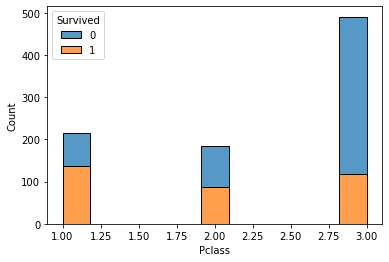

In [5]:
sn.histplot(data = titanic_train, x = "Pclass",hue="Survived", multiple='stack')




We can coclude that that majority of the passengers from the __first class__ survived(around __70%__) whereas about only __50%__ survived from __second class__ and about __30%__ from  __third class__

Similarly, let's see what kind of relationship exists between __sex class__ and __Survived class__. 

<AxesSubplot:xlabel='Sex', ylabel='Count'>

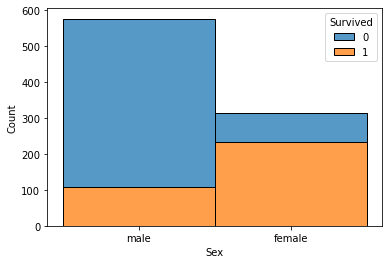

In [6]:
sn.histplot(data=titanic_train, x = 'Sex',hue = 'Survived', multiple='stack')


We can observe from the above plot that more female passengers survived as compared to male passengers.

Moving ahead let's see the relationship between __No. of Siblings/Spouses present on the ship__ and the __Survived class__ 

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

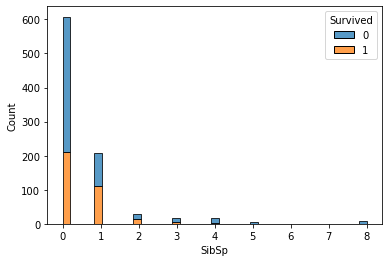

In [7]:
sn.histplot(data = titanic_train, x = 'SibSp', hue = 'Survived', multiple='stack')

We can observe that those who didn't have any family present on board titanic survived in more numbers as compared to those who had family. However, the percent of people who survived in higher percent (x/xtotal*100) were those who had only one family member with them.

Moving onto Realtionship between __Parents and children on board__ and __Survived__ class

<AxesSubplot:xlabel='Parch', ylabel='Count'>

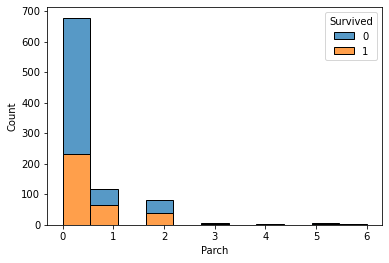

In [8]:
sn.histplot(data = titanic_train,x = 'Parch', hue = 'Survived', multiple = 'stack')


We can observe that more people with zero or one parent or children aboard survived the shipwreck.

Moving on, Let's try to inspect the relationship between __Place of Embarkment__ and __Survived__  

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

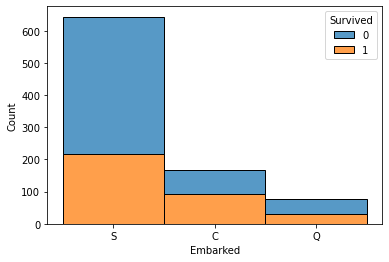

In [9]:
sn.histplot(data = titanic_train,x = 'Embarked', hue = 'Survived', multiple = 'stack')

C = Cherbourg, Q = Queenstown, S = Southampton.
We can conclude that more people from Southampton survived as compared to Cherbourg and Queenstown.

We won't be observing relationship between __Fare__ and __Survived__ because the results would be same as the comparison between PClass and Survived.

### FIX MISSING VALUES

Now, Let's fix start fixing the missing values. We know that Age, Cabin and Embarked columns have missing values. Let's fix them one by one.

#### 1) AGE

As we know that 177 values are missing from __AGE__ Column let's replace these values with mean age of the column.

In [10]:
titanic_train['Age'].fillna(titanic_train['Age'].mean(),inplace=True)

In [11]:
titanic_train['Age'].count()


891

Hence, we can conclude that each cell in __AGE__ Column has a value. Similarly, we will replace the missing __AGE__ values in test set.

In [12]:
titanic_test['Age'].fillna(titanic_test['Age'].mean(), inplace=True)

### 2) EMBARKED

First Let's see how many values as NA in Embarked Column.

In [13]:
titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We can see that there are 2 missing values in the Embarked table. Let's fill this empty cell with the mode of the values from __Embarked__ Column.

In [14]:
titanic_train['Embarked'].fillna('S',inplace=True)

Similary, we will fill the values in test dataset.

### 3) CABIN

There are a lot of missing values in Cabin table we cannot fill those values hence we will drop the cabin column all together.

In [15]:
titanic_train.drop(columns='Cabin', axis=1, inplace= True)
titanic_test.drop(columns='Cabin',axis=1,inplace=True)

In [16]:
titanic_train.head()
titanic_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


Now that we have taken care of all the missing data. Let's see if there are any irrelevant data columns in our data. We know that __ticket__ and __PassengerId__ is very irrelevant to our problem. Hence let's drop the ticket column in training and testing datasets.


In [17]:
titanic_train.drop(columns='Ticket', axis=1, inplace=True)
titanic_test.drop(columns='Ticket',axis=1,inplace=True)
titanic_train.drop(columns='PassengerId', axis=1, inplace=True)


Now Let's have a final look at our data.

In [18]:
titanic_train.info()
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   S

As we can see that in test set a fare value is missing. Let's replace this value with mode fare and move on.  

In [19]:
titanic_test['Fare'].value_counts()

7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64

In [20]:
titanic_test['Fare'].fillna(7.7500,inplace=True)
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [21]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


Now that all the missing values are taken care of, Let's see if there's any scope of adding or deleting a Column (Feature Engineering) to improve accuracy of our model

As we know that we have two columns named SibSp (which represents number of siblings and spouses onboard titanic) and Parch(which represents number of Parents and children onboard titanic), Using this information we can add a feature which will demonstrate whether a passenger came alone or not. Let's name that feature as __BoardedAlone__ which will be true if the passenger is alone on the titanic and false if he has family onboard titanic.

In [22]:
titanic_train['BoardedAlone'] = ((titanic_train['SibSp']+titanic_train['Parch'])>0)
titanic_train.BoardedAlone = titanic_train.BoardedAlone.map({True: 0, False: 1})
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,BoardedAlone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Similarly, we will add __BoardedAlone__ column to test dataset

In [23]:
titanic_test['BoardedAlone'] = ((titanic_test['SibSp']+titanic_test['Parch'])>0)
titanic_test.BoardedAlone = titanic_test.BoardedAlone.map({True: 0, False: 1})
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,BoardedAlone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0


## CONVERTING CATEGORICAL VALUES TO NUMERICAL

Now Let's convert the categorical values to numerical in both training and testing sets.

In [24]:
dictSex = { 'female':0,'male':1}
dictEmbarked = {'C':0,'Q':1, 'S':2}
titanic_train.Sex = titanic_train.Sex.map(dictSex)
titanic_test.Sex = titanic_test.Sex.map(dictSex)
titanic_train.Embarked = titanic_train.Embarked.map(dictEmbarked)
titanic_test.Embarked = titanic_test.Embarked.map(dictEmbarked)
titanic_train.head()
titanic_test.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,BoardedAlone
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,BoardedAlone
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2,0


now the data is completely cleaned and ready to get processed by machine learning algorithm.


## SPLITTING DATA AND APPLYING MACHINE LEARNING ALGORITHM


let's split the data as output(Survived) and input(features). We are going to import train test split for this.

In [25]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "BoardedAlone"]
X = titanic_train[features]
Y = titanic_train['Survived']
test_X = titanic_test[features]


In [26]:
from sklearn.model_selection import train_test_split
train_X,val_x,train_Y,val_y = train_test_split(X,Y, test_size = 0.2,random_state = 88)

We will use Random Forester Algorithm which is great for classification problems as well as regression problems.

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
modelR = RandomForestRegressor(random_state = 88)
modelR.fit(train_X,train_Y)
predict_valY = modelR.predict(val_x)
predict_valY = predict_valY.round(0).astype(int)
mean_absolute_error(val_y,predict_valY)
score = modelR.score(train_X,train_Y)
score



RandomForestRegressor(random_state=88)

0.19553072625698323

0.8907987424117997

Now let's test the build model with test dataset.


In [28]:
test_predict_y = modelR.predict(test_X)
test_predict_y = test_predict_y.round(0).astype(int)

## Save the predictions to file. 

In [29]:
ans_file = pd.DataFrame({'PassengerId':titanic_test.PassengerId,'Survived':test_predict_y})
ans_file.to_csv('submission.csv',index=False)